<a href="https://colab.research.google.com/github/Margo-by/neural-networks/blob/main/lab9_2_neironki.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 2. (из темы 9.2):

Дообучите нейронную сеть ResNet34 распознаванию Вашего лица на фотографии. Используйте дообученную сеть для распознавания Вашего лица на других фотографиях (другой возраст; другой ракурс; часть лица закрыта, например, очками).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Detection 0: Left: 418 Top: 162 Right: 803 Bottom: 547


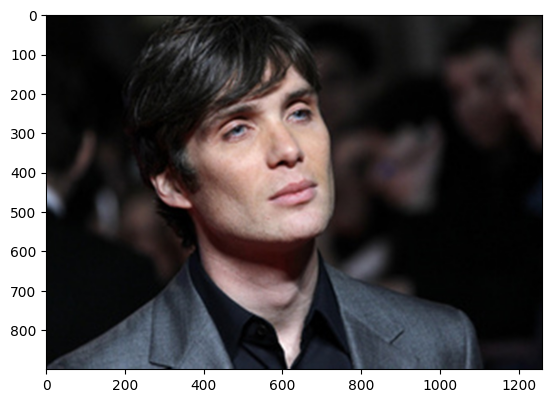

In [7]:
import dlib
from skimage import io
from scipy.spatial import distance
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

sp = dlib.shape_predictor('/content/drive/MyDrive/neiro/shape_predictor_68_face_landmarks.dat')
facerec = dlib.face_recognition_model_v1('/content/drive/MyDrive/neiro/dlib_face_recognition_resnet_model_v1.dat')
detector = dlib.get_frontal_face_detector()


img = io.imread('/content/drive/MyDrive/neiro/99638.jpg')

dets = detector(img, 1)

for k, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)


face_descriptor1 = facerec.compute_face_descriptor(img, shape)


_, ax = plt.subplots()
ax.imshow(img)
plt.show()

Detection 0: Left: 298 Top: 724 Right: 1256 Bottom: 1682


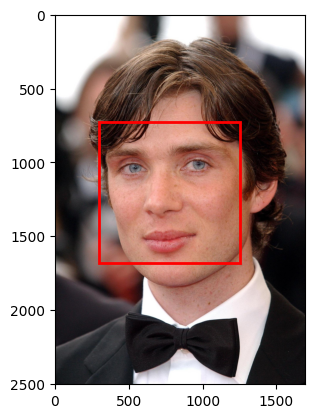

In [3]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = io.imread('/content/drive/MyDrive/neiro/1578322987_3-4.jpg')

dets_webcam = detector(img, 1)

# Создаем новый объект Figure и оси Axes
fig, ax = plt.subplots()

# Отображаем изображение
ax.imshow(img)

for k, d in enumerate(dets_webcam):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)

    # Создаем прямоугольник на основе координат
    rect = patches.Rectangle((d.left(), d.top()), d.right()-d.left(), d.bottom()-d.top(), linewidth=2, edgecolor='r', facecolor='none')

    # Добавляем прямоугольник на оси
    ax.add_patch(rect)

# Отображаем рамку на изображении
plt.show()

In [4]:
face_descriptor2 = facerec.compute_face_descriptor(img, shape)

a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)
if(a < 0.6):
  print("same")
else:
  print("diff")

0.36151824207351546
same


Detection 0: Left: 687 Top: 291 Right: 910 Bottom: 514


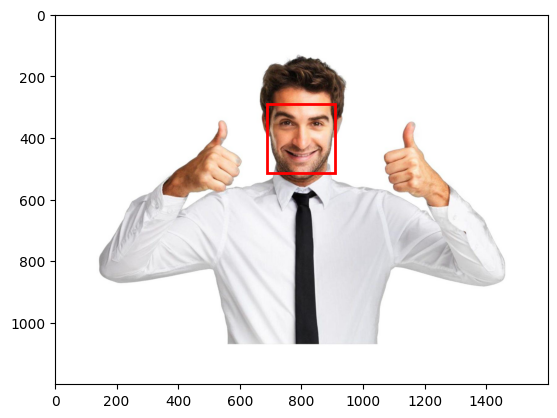

In [5]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

img = io.imread('/content/drive/MyDrive/neiro/235772_DHmQpMf4iOKkppEbmUxEgg-scaled.jpeg')

dets_webcam = detector(img, 1)

# Создаем новый объект Figure и оси Axes
fig, ax = plt.subplots()

# Отображаем изображение
ax.imshow(img)

for k, d in enumerate(dets_webcam):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {}".format(
        k, d.left(), d.top(), d.right(), d.bottom()))
    shape = sp(img, d)

    # Создаем прямоугольник на основе координат
    rect = patches.Rectangle((d.left(), d.top()), d.right()-d.left(), d.bottom()-d.top(), linewidth=2, edgecolor='r', facecolor='none')

    # Добавляем прямоугольник на оси
    ax.add_patch(rect)

# Отображаем рамку на изображении
plt.show()

In [6]:
face_descriptor2 = facerec.compute_face_descriptor(img, shape)

a = distance.euclidean(face_descriptor1, face_descriptor2)
print(a)
if(a < 0.6):
  print("same")
else:
  print("diff")

0.7811462170182245
diff
